In [65]:
import numpy as np
import matplotlib.pyplot as plt


In [66]:
def plot_object(points, label="Object", color="blue"):

    closed_points = np.vstack([points, points[0]])

    plt.plot(closed_points[:, 0], closed_points[:, 1], color=color, label=label)
    
    plt.scatter(closed_points[:, 0], closed_points[:, 1], color=color)



In [67]:
def translate(points, tx, ty):
    T = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]]) 
    return apply_transformation(points, T)

In [68]:
def scale(points, sx, sy):
    S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return apply_transformation(points, S)


In [69]:
def rotate(points, angle):
    radians = np.radians(angle)
    R = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, R)


In [70]:
def reflect(points, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    return apply_transformation(points, R)

In [71]:
def shear(points, shx=0, shy=0):
    Sh = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    return apply_transformation(points, Sh)


In [72]:
def apply_transformation(points, T):
    homogenous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points = homogenous_points @ T.T
    return transformed_points[:, :2]

In [73]:
points = np.array([[0, 0], [2, 0], [1, 2]])

plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

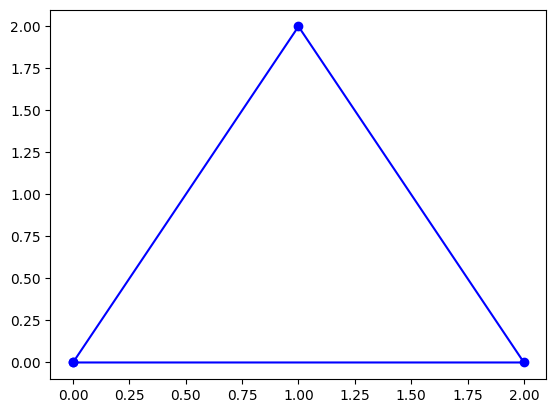

In [74]:
plot_object(points, label="Original", color="blue")


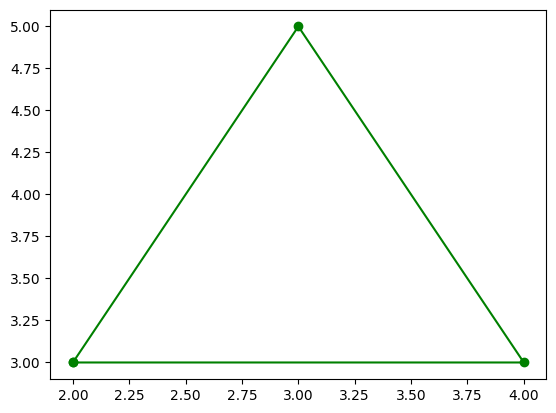

In [ ]:
#translation
translated = translate(points, 2, 3)
plot_object(translated, label="Translated", color="green")


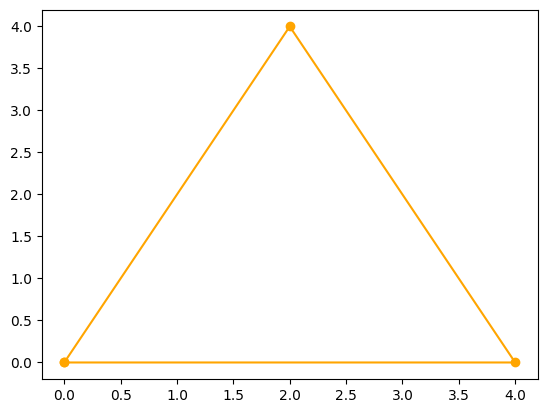

In [ ]:
#scaling
scaled = scale(points, 2, 2)
plot_object(scaled, label="Scaled", color="orange")

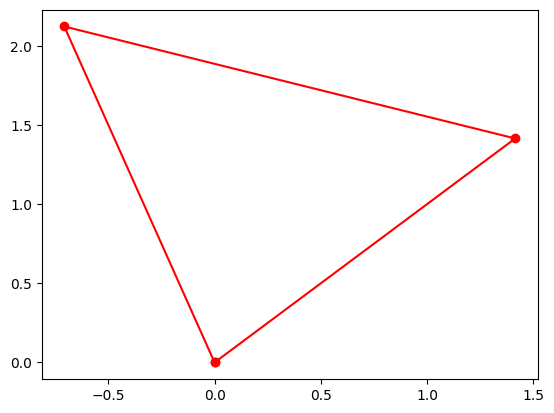

In [ ]:
#rotation
rotated = rotate(points, 45)
plot_object(rotated, label="Rotated", color="red")


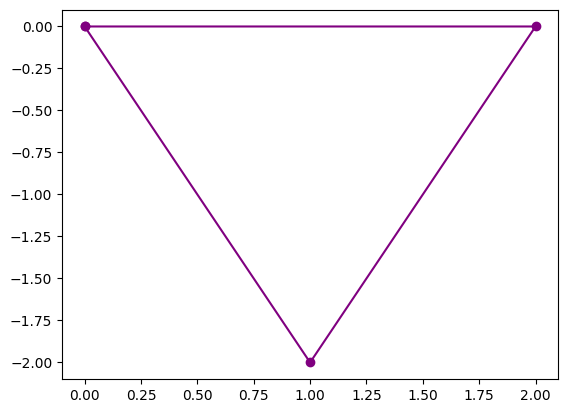

In [ ]:
#reflection
reflected = reflect(points, 'x')
plot_object(reflected, label="Reflected (X-axis)", color="purple")


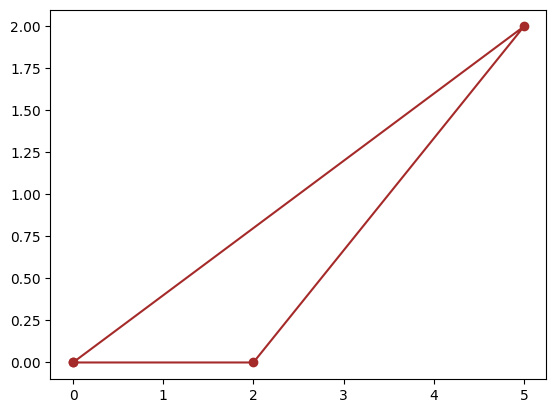

In [ ]:
#shearing in x-axis
sheared = shear(points, shx=2, shy=0)
plot_object(sheared, label="Sheared (X-axis)", color="brown")


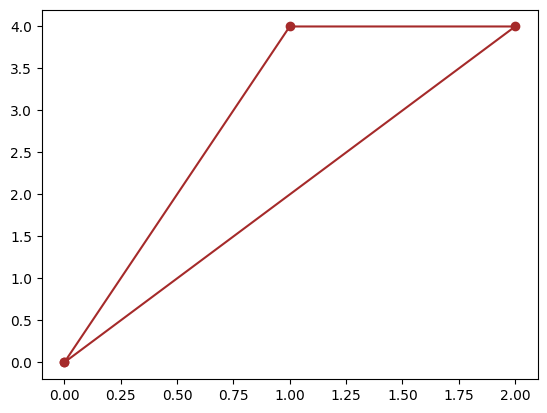

In [86]:
#shearing in y-axis
sheared = shear(points, shx=0, shy=2)
plot_object(sheared, label="Sheared (X-axis)", color="brown")

In [87]:
!pip install opencv-python


In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [90]:
image = cv2.imread('image.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [91]:
def display_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


In [92]:
def translate_image(image, tx, ty):
    rows, cols, _ = image.shape
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, T, (cols, rows))


In [93]:
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)

In [94]:
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))


In [95]:
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)


In [96]:
def shear_image(image, shx=0, shy=0):
    rows, cols, _ = image.shape
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))


In [97]:
def crop_image(image, x_start, y_start, x_end, y_end):
    return image[y_start:y_end, x_start:x_end]

In [98]:
translated = translate_image(image, 50, 50)
scaled = scale_image(image, 1.5, 1.5)
rotated = rotate_image(image, 45)
reflected = reflect_image(image, 'x')
sheared = shear_image(image, shx=0.5)
cropped = crop_image(image, 50, 50, 300, 300)

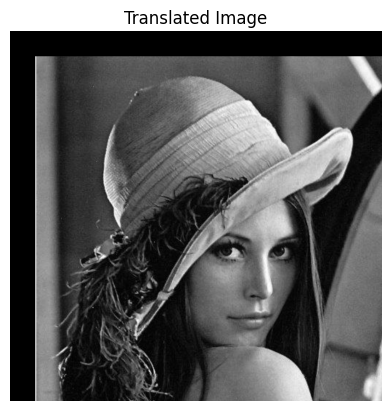

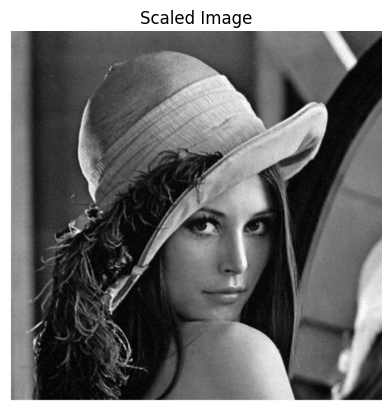

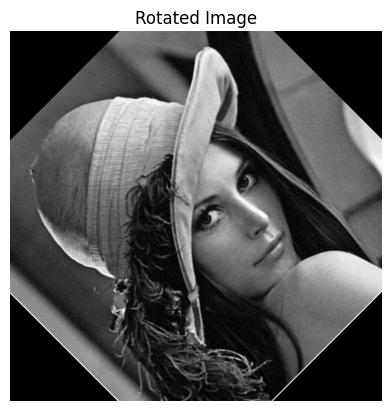

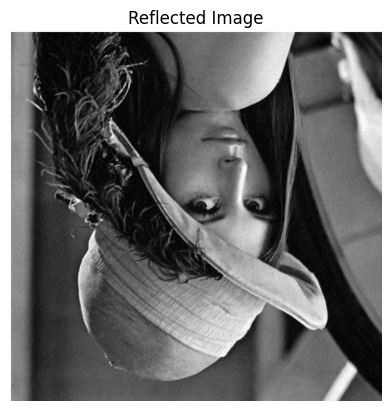

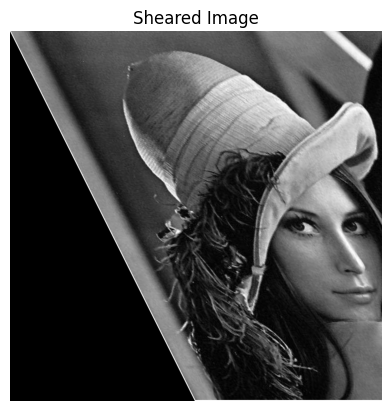

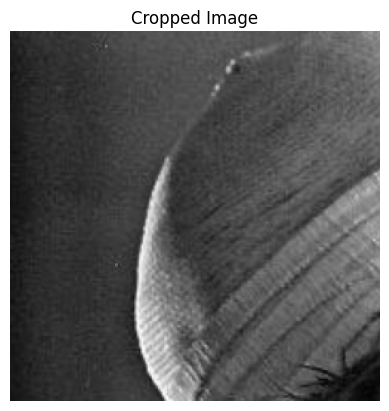

In [100]:
display_image(translated, title="Translated Image")
display_image(scaled, title="Scaled Image")
display_image(rotated, title="Rotated Image")
display_image(reflected, title="Reflected Image")
display_image(sheared, title="Sheared Image")
display_image(cropped, title="Cropped Image")